## Grupo 23

**Nombre:** Raúl Miguel Carrero Martín 
**Nia**: 100451286 
**Grupo de clase**: 81

**Nombre:** Gonzalo Vela Sacristán
**Nia**: 100472334
**Grupo de clase**: 84

In [99]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install pickle
%pip install time
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gvela\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gvela\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gvela\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gvela\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
You should consider upgrading via the 'c:\Users\gvela\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time
You should consider upgrading via the 'c:\Users\gvela\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gvela\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


# Importación de los datos y librerias

In [100]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import time
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style
style.use('ggplot') 


# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch



## Importar los datos

In [101]:
data = pd.read_csv("data/stars_data.csv")
display(data)

# Copiamos los datos y los estandarizamos
# ==============================================================================
data_df = data[['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']].copy()

print("Cantidad de filas y columnas: ", data_df.shape)
print("Nombre de las columnas: ", data_df.columns)




,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


Cantidad de filas y columnas:  (240, 6)
Nombre de las columnas:  Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class'], dtype='object')


In [102]:
# Mostramos las columnas con valores nulos
print("Columnas con valores nulos: ")
print(data_df.isnull().sum())

Columnas con valores nulos: 
Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
dtype: int64


In [103]:
# Mostramos las columnas con NaN
print("Columnas con NaN: ")
print(data_df.isna().sum())

Columnas con NaN: 
Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
dtype: int64


In [104]:
# Describimos las variables
print("Estadísticas de las variables:")
print(data_df.describe())

Estadísticas de las variables:
        Temperature              L            R         A_M
count    240.000000     240.000000   240.000000  240.000000
mean   10497.462500  107188.361635   237.157781    4.382396
std     9552.425037  179432.244940   517.155763   10.532512
min     1939.000000       0.000080     0.008400  -11.920000
25%     3344.250000       0.000865     0.102750   -6.232500
50%     5776.000000       0.070500     0.762500    8.313000
75%    15055.500000  198050.000000    42.750000   13.697500
max    40000.000000  849420.000000  1948.500000   20.060000


# 1.- Kmeans 

In [105]:

def distancia(a, b):
    return np.sqrt(np.sum((a - b)**2))

def kmeans(datos, k, max_iter=100):
    np.random.seed(23)
    # Inicialización aleatoria de los centroides
    centroides_indices = np.random.choice(len(datos), k, replace=False)
    centroides = datos[centroides_indices]
    threshold = 0.001
    asignaciones = []

    for iteration in range(max_iter):
        # Asignar cada punto al centroide más cercano
        asignaciones = []
        for dato in datos:
            distancias = []
            for centroide in centroides:
                distancias.append(distancia(dato, centroide))
            asignacion = np.argmin(distancias)
            asignaciones.append(asignacion)

        # Actualizar los centroides
        nuevos_centroides = []
        for j in range(k):
            puntos_asignados = []
            for i in range(len(datos)):
                punto_asignado = [datos[i], asignaciones[i]]
                if punto_asignado[1] == j:
                    puntos_asignados.append(datos[i])
            nuevo_centroide = np.mean(puntos_asignados, axis=0)
            nuevos_centroides.append(nuevo_centroide)
        nuevos_centroides = np.array(nuevos_centroides)

        d_centroides = []
        for i in range(k):
            d_centroides.append(distancia(centroides[i], nuevos_centroides[i]))
        if np.max(d_centroides) < threshold:
            break

        centroides = nuevos_centroides
    print("Iteración final: ", iteration)
    print("Centroides finales: ", nuevos_centroides )
    return centroides, asignaciones

La función distancia(a, b) calcula la distancia euclidiana entre dos puntos en el espacio de características. Utiliza la función np.sqrt de NumPy para calcular la raíz cuadrada de la suma de los cuadrados de las diferencias entre las coordenadas de los puntos. La función kmeans(datos, k, max_iter=100) toma tres argumentos de entrada datos, klusters y máximas iteraciones. Primero se inicializa aleatoriamente un conjunto de centroides iniciales a partir de los datos proporcionados. Luego, se asignan todos los puntos de datos al centroide más cercano. Después, se actualizan los centroides calculando la media de todos los puntos asignados a cada centroide. Este proceso de asignación y actualización de centroides se repite hasta que se alcanza un criterio de detención. En este caso, el criterio de detención es que la diferencia entre los centroides antiguos y los nuevos sea menor que el threshold, o se alcanza el número máximo de iteraciones (max_iter)

Comparación

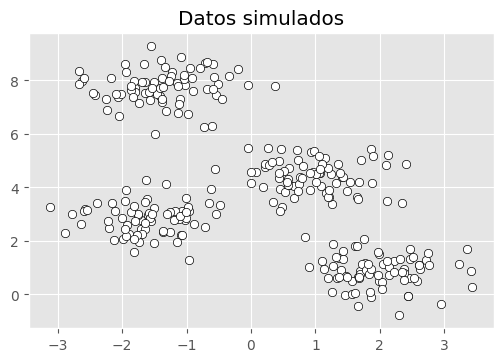

In [106]:
# Simulación de datos
X, y = make_blobs(
    n_samples    = 300,
    n_features   = 2,
    centers      = 4,
    cluster_std  = 0.60,
    shuffle      = True,
    random_state = 0
)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = 'white',
    marker    = 'o',
    edgecolor = 'black',
)
ax.set_title('Datos simulados');

Simulamos datos con la función make blobs para probar nuestra función k-means

Iteración final:  3
Centroides finales:  [[ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]]


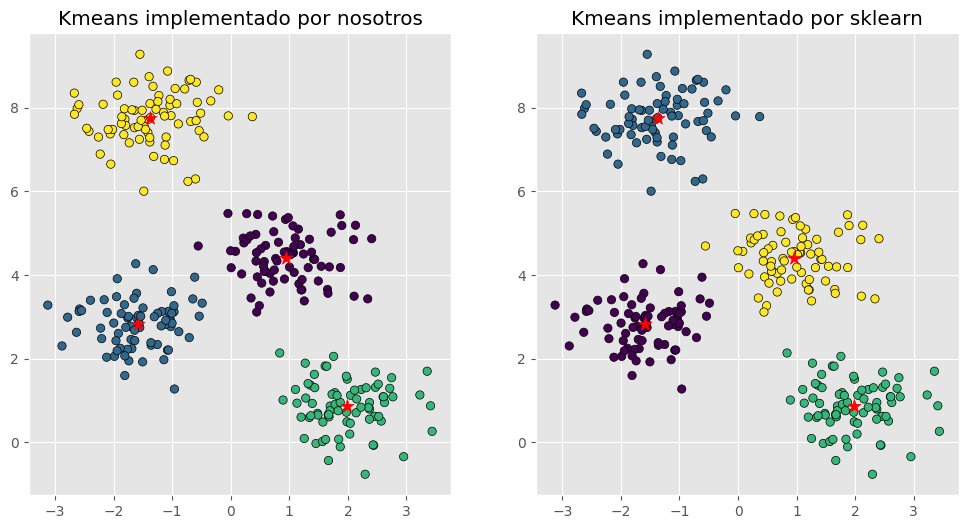

In [107]:
# Kmeans con 4 clusters
centroides, asignaciones = kmeans(X, 4)
# Con la función kmeans de sklearn
kmeans_sklearn = KMeans(n_clusters=4, random_state=23).fit(X)

# Representación gráfica
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = asignaciones,
    cmap = 'viridis',
    marker    = 'o',
    edgecolor = 'black',
)
ax[0].scatter(
    x = centroides[:, 0],
    y = centroides[:, 1],
    c = 'red',
    s = 100,
    marker = '*'
)
ax[0].set_title('Kmeans implementado por nosotros')

ax[1].scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = kmeans_sklearn.labels_,
    cmap = 'viridis',
    marker    = 'o',
    edgecolor = 'black',
)
ax[1].scatter(
    x = kmeans_sklearn.cluster_centers_[:, 0],
    y = kmeans_sklearn.cluster_centers_[:, 1],
    c = 'red',
    s = 100,
    marker = '*'
)
ax[1].set_title('Kmeans implementado por sklearn');


Aquí observamos la diferencia de resultados con los datos simulados, entre nuestra función creada y la función k-means de skicit learn, vemos que a rangos generales son muy similares en los resultados

# 2.- Encoding de los datos categóricos

Primero observamos los valores de las variables categóricas

In [108]:
print("Valores de la columna Color: ")
print(data_df.Color.unique())

print("Valores de la columna Spectral_Class: ")
print(data_df.Spectral_Class.unique())

Valores de la columna Color: 
['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']
Valores de la columna Spectral_Class: 
['M' 'B' 'A' 'F' 'O' 'K' 'G']


Mapeamos los valores obtenidos de las columnas *Color* y *Spectral Class*.

In [109]:
# Establecemos una unificación de colores:
mapping_color = { 
    'Red': ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['yellowish', 'Yellowish'],
    'White-Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

# Establecemos una unificación de colores:
mapping_spectral = {
    'M': ['M'],
    'K': ['K'],
    'G': ['G'],
    'F': ['F'],
    'A': ['A'],
    'B': ['B'],
    'O': ['O'],
}

In [110]:
# Mapeamos los datos
for target_color, source_colors in mapping_color.items():
  data_df.loc[data_df.Color.isin(source_colors), 'Color'] = target_color

print("Valores de la columna Color: ")
print(data_df.Color.unique())

Valores de la columna Color: 
['Red' 'Blue-White' 'White' 'White-Yellow' 'Yellow-Orange' 'Blue' 'Orange'
 'Yellow' 'Orange-Red']


## 2.1.- One-Hot-Encoding

In [111]:
one_hot_df = data_df.copy()

encoder = OneHotEncoder()

# Ajustamos el codificador y transformamos las columnas
one_hot_encoded = encoder.fit_transform(one_hot_df[['Color', 'Spectral_Class']])

# Cogemos los nombres de las nuevas columnas
feature_names = encoder.get_feature_names_out(['Color', 'Spectral_Class'])

# Creamos un DataFrame con los datos transformados
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=feature_names)

# Eliminamos las columnas originales
one_hot_df = one_hot_df.drop(columns=['Color', 'Spectral_Class'])

# Añadimos las nuevas columnas
one_hot_df = pd.concat([one_hot_df, one_hot_encoded_df], axis=1)

display(one_hot_df)


,Temperature,L,R,A_M,Color_Blue,Color_Blue-White,Color_Orange,Color_Orange-Red,Color_Red,Color_White,Color_White-Yellow,Color_Yellow,Color_Yellow-Orange,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3042,0.000500,0.1542,16.60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2600,0.000300,0.1020,18.70,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2800,0.000200,0.1600,16.65,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1939,0.000138,0.1030,20.06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
236,30839,834042.000000,1194.0000,-10.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
237,8829,537493.000000,1423.0000,-10.73,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
238,9235,404940.000000,1112.0000,-11.23,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Hacemos un one hot encoding para transformar los datos de variables categóricas a númericas con el algoritmo one hot encoding de asignación de valor

## 2.2.- Ordinal Encoding

In [112]:
# Obtenemos los colores ordenados (directamente del mapping!)
colors = list(mapping_color.keys())


oe = OrdinalEncoder(categories=[colors])
color_encoded = oe.fit_transform(data_df.Color.values.reshape(-1, 1))


# Obtenemos los colores ordenados (directamente del mapping!)
spectral = list(mapping_spectral.keys())


oe = OrdinalEncoder(categories=[spectral])
spectral_encoded = oe.fit_transform(data_df.Spectral_Class.values.reshape(-1, 1))

In [113]:
ordinal_df = data_df.copy()

# cambiamos los valores de las columnas categóricas a numéricas
ordinal_df['Color'] = color_encoded
ordinal_df['Spectral_Class'] = spectral_encoded

display(ordinal_df)


,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0.0,0.0
1,3042,0.000500,0.1542,16.60,0.0,0.0
2,2600,0.000300,0.1020,18.70,0.0,0.0
3,2800,0.000200,0.1600,16.65,0.0,0.0
4,1939,0.000138,0.1030,20.06,0.0,0.0
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,8.0,6.0
236,30839,834042.000000,1194.0000,-10.63,8.0,6.0
237,8829,537493.000000,1423.0000,-10.73,6.0,4.0
238,9235,404940.000000,1112.0000,-11.23,6.0,4.0


Hacemos Ordinal Encoding de las variables categoricas asignando un valor segun la escala especificada en el enunciado siendo M la la asociación mas fría y O la mas caliente por tanto los valores se asignan de 0 a 8 respectivamente.

# 3.- Modelos

## 3.1- PCA

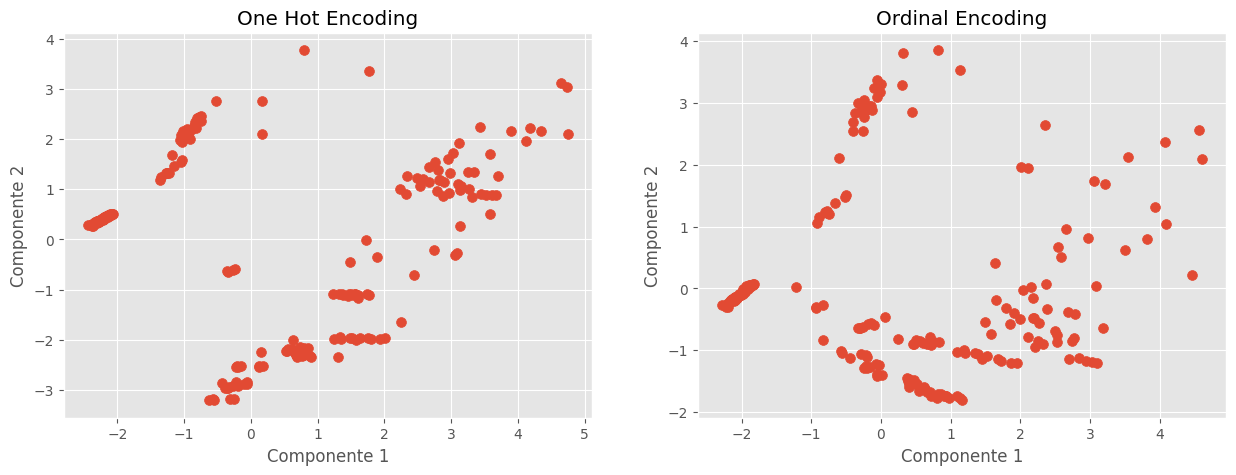

In [114]:
scaler = StandardScaler()
pca = PCA(n_components=2)

one_hot_scaled = scaler.fit_transform(one_hot_df)
ordinal_scaled = scaler.fit_transform(ordinal_df)

# Reducción de la dimensionalidad

X_one_hot_pca = pca.fit_transform(one_hot_scaled)
X_ordinal_pca = pca.fit_transform(ordinal_scaled)

# Represenantamos los datos en dos gráficas diferentes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].scatter(X_one_hot_pca[:, 0], X_one_hot_pca[:, 1], s=50)
axs[0].set_title('One Hot Encoding')
axs[0].set_xlabel('Componente 1')
axs[0].set_ylabel('Componente 2')

axs[1].scatter(X_ordinal_pca[:, 0], X_ordinal_pca[:, 1], s=50)
axs[1].set_title('Ordinal Encoding')
axs[1].set_xlabel('Componente 1')
axs[1].set_ylabel('Componente 2')

plt.show()


Tras haber transformado los valores categóricos a númericos con los 2 métodos de transformación, asignandoles valores ordinales y a traves de la transformación one hot encoding, aplicamos un pca para reducir la dimensionalidad de los datos a 2 variables y para así poder ejecutar luego el k-means. Observamos la diferencia entre los PCA a la hora de simular los datos debido a los diferentes valores que toman las columnas 'color' y 'espectral class' tras las transformaciones. 

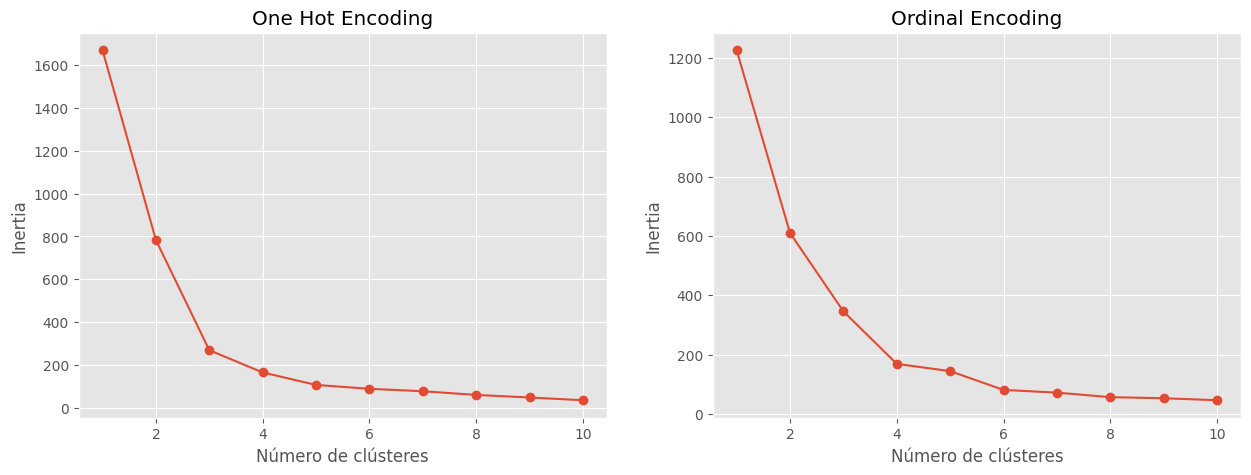

In [115]:

# Número óptimo de clústeres
# ==============================================================================
inertia_oh = []
inertia_ordinal = []
for i in range(1, 11):
    kmeans_inertia = KMeans(n_clusters=i, random_state=123).fit(X_ordinal_pca)
    inertia_ordinal.append(kmeans_inertia.inertia_)

for i in range(1, 11):
    kmeans_inertia = KMeans(n_clusters=i, random_state=123).fit(X_one_hot_pca)
    inertia_oh.append(kmeans_inertia.inertia_)

# Representación de los dato en dos gráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(range(1, 11), inertia_oh, marker='o')
axs[0].set_title('One Hot Encoding')
axs[0].set_xlabel('Número de clústeres')
axs[0].set_ylabel('Inertia')

axs[1].plot(range(1, 11), inertia_ordinal, marker='o')
axs[1].set_title('Ordinal Encoding')
axs[1].set_xlabel('Número de clústeres')
axs[1].set_ylabel('Inertia')

plt.show()


El propósito de trazar este gráfico es identificar el punto de inflexión, donde la disminución en la inercia disminuye significativamente. Este punto indica el número óptimo de clústeres para el conjunto de datos dado. La elección del número de clústeres adecuado es crucial para obtener clústeres significativos y útiles en el análisis de los datos. Sin embargo en estas gráficas es poco visible el punto de inflexión por lo que recurriremos a otros métodos.

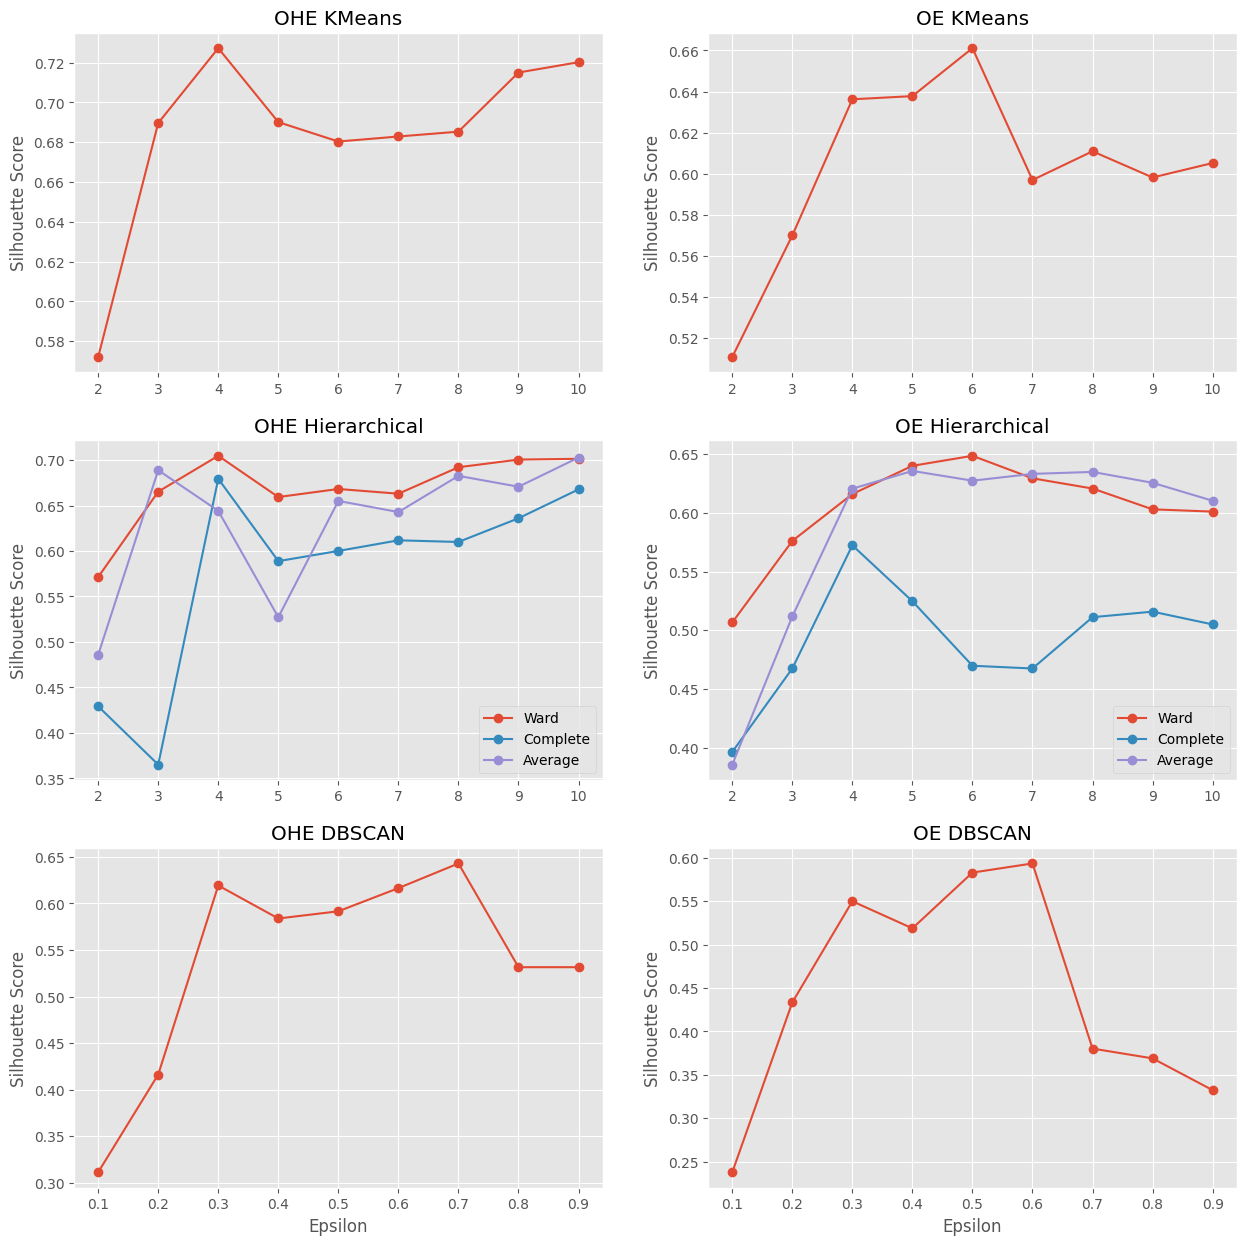

In [116]:
# Silhouette Score
silhouette_oh = []
silhouette_ordinal = []
for i in range(2, 11):
    kmeans_silhouette = KMeans(n_clusters=i, random_state=123).fit_predict(X_one_hot_pca)
    silhouette_oh.append(silhouette_score(X_one_hot_pca, kmeans_silhouette))

    kmeans_silhouette_oe = KMeans(n_clusters=i, random_state=123).fit_predict(X_ordinal_pca)
    silhouette_ordinal.append(silhouette_score(X_ordinal_pca, kmeans_silhouette_oe))

# silhouette for hierarchical clustering
silhouette_hc_oh = []
silhouette_hc_ordinal = []
silhouette_hierarchical_oh_complete = []
silhouette_hierarchical_ordinal_complete = []
silhouette_hierarchical_oh_average = []
silhouette_hierarchical_ordinal_average = []
for i in range(2, 11):
    hc = AgglomerativeClustering(n_clusters=i, linkage='ward').fit_predict(X_one_hot_pca)
    silhouette_hc_oh.append(silhouette_score(X_one_hot_pca, hc))
    hc = AgglomerativeClustering(n_clusters=i, linkage='complete').fit_predict(X_one_hot_pca)
    silhouette_hierarchical_oh_complete.append(silhouette_score(X_one_hot_pca, hc))
    hc = AgglomerativeClustering(n_clusters=i, linkage='average').fit_predict(X_one_hot_pca)
    silhouette_hierarchical_oh_average.append(silhouette_score(X_one_hot_pca, hc))

    hc = AgglomerativeClustering(n_clusters=i, linkage='ward').fit_predict(X_ordinal_pca)
    silhouette_hc_ordinal.append(silhouette_score(X_ordinal_pca, hc))
    hc = AgglomerativeClustering(n_clusters=i, linkage='complete').fit_predict(X_ordinal_pca)
    silhouette_hierarchical_ordinal_complete.append(silhouette_score(X_ordinal_pca, hc))
    hc = AgglomerativeClustering(n_clusters=i, linkage='average').fit_predict(X_ordinal_pca)
    silhouette_hierarchical_ordinal_average.append(silhouette_score(X_ordinal_pca, hc))


# silhouette for DBSCAN
silhouette_dbscan_oh = []
silhouette_dbscan_ordinal = []
for i in np.arange(0.1, 1, 0.1):
    dbscan = DBSCAN(eps=i).fit_predict(X_one_hot_pca)
    silhouette_dbscan_oh.append(silhouette_score(X_one_hot_pca, dbscan))

    dbscan = DBSCAN(eps=i).fit_predict(X_ordinal_pca)
    silhouette_dbscan_ordinal.append(silhouette_score(X_ordinal_pca, dbscan))

# en seis graficos tres para cada modelos de codificación
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].plot(range(2, 11), silhouette_oh, marker='o')
axs[0, 0].set_title('OHE KMeans')
axs[0, 0].set_ylabel('Silhouette Score')

axs[0, 1].plot(range(2, 11), silhouette_ordinal, marker='o')
axs[0, 1].set_title('OE KMeans')
axs[0, 1].set_ylabel('Silhouette Score')

#agrupa en hierarchical por cada tipo de link
axs[1, 0].plot(range(2, 11), silhouette_hc_oh, marker='o')
axs[1, 0].plot(range(2, 11), silhouette_hierarchical_oh_complete, marker='o')
axs[1, 0].plot(range(2, 11), silhouette_hierarchical_oh_average, marker='o')
axs[1, 0].set_title('OHE Hierarchical')
axs[1, 0].set_ylabel('Silhouette Score')

axs[1, 1].plot(range(2, 11), silhouette_hc_ordinal, marker='o')
axs[1, 1].plot(range(2, 11), silhouette_hierarchical_ordinal_complete, marker='o')
axs[1, 1].plot(range(2, 11), silhouette_hierarchical_ordinal_average, marker='o')
axs[1, 1].set_title('OE Hierarchical')
axs[1, 1].set_ylabel('Silhouette Score')

#agrupa en dbscan por cada tipo de codificación
axs[2, 0].plot(np.arange(0.1,1,0.1), silhouette_dbscan_oh, marker='o')
axs[2, 0].set_title('OHE DBSCAN')
axs[2, 0].set_xlabel('Epsilon')
axs[2, 0].set_ylabel('Silhouette Score')

axs[2, 1].plot(np.arange(0.1,1,0.1), silhouette_dbscan_ordinal, marker='o')
axs[2, 1].set_title('OE DBSCAN')
axs[2, 1].set_xlabel('Epsilon')
axs[2, 1].set_ylabel('Silhouette Score')

axs[1, 0].legend(['Ward', 'Complete', 'Average'])
axs[1, 1].legend(['Ward', 'Complete', 'Average'])

plt.show()



El propósito de trazar estos gráficos es identificar el número óptimo de clústeres que maximiza el Silhouette Score y en caso del DBScan el epsilon que maximiza el silhouette. Un Silhouette Score más alto indica una mejor calidad de clustering. Por lo tanto, el número óptimo de los hiperparámetros generalmente se elige donde el Silhouette Score alcanza su valor máximo. Este metodo se puede aplicar a los modelos de agrupamiento elegidos por lo que se puede considerar una especie de ajuste de hiperparametros, pudiendo evaluar que parametro e optimo para cada modelo.
Para cada modelo el mejor hiperparámetro:
- One Hot Encoding (OHE):
    - Kmeans:
        - Clusters: 4
    - Hierarchical:
        - Linkage: ward
        - Clusters: 4
    - DBscan:
        - Epsilon: 0.7
- Ordinal Encoding (OE):
    - Kmeans:
        - Clusters: 6
    - Hierarchical:
        - Linkage: ward
        - Clusters: 6
    - DBscan:
        - Epsilon: 0.6

In [117]:
times_score = []
silhouette_scores = []

## 3.2.- Modelos para One Hot Encoding

Vamos a tratar 3 modelos distintos más el nuestro. 

El K-means esta basado en centroides y el número de clusters es especifico. El funcionamiento del K-means , empieza iniciando con K centroides aleatorios, luego asigna puntos al centroide más cercano y recalcula los centroides. Este proceso se repite hasta que los centroides convergen.

El Hierarchical clustering se basa en la estructura jerárquica. No es necesario especificar de antemano; puede generar un dendrograma que muestra la estructura jerárquica de los clusters y luego decidir el número de clusters cortando el dendrograma. Hay dos formas en las que funciona, puede ser aglomerativo (comenzando con cada punto como un cluster y fusionando clusters similares) o divisivo (comenzando con todos los puntos en un solo cluster y dividiéndolo en clusters más pequeños). Las decisiones de fusión o división se basan en medidas de distancia entre clusters o puntos.

El DBSCAN (Density-Based Spatial Clustering of Applications with Noise) esta centrado en la densidad y no es necesario especificar de antemano el número de clusters. Identifica clusters basado en regiones de alta densidad de puntos. Los puntos se clasifican como núcleo, borde o ruido, según la densidad de puntos dentro de su vecindad.

### Algoritmo Kmeans

Iteración final:  4
Centroides finales:  [[-0.21762153 -2.83162543]
 [-1.86065987  0.85169618]
 [ 1.14338483 -1.63542222]
 [ 3.1447558   1.36143512]]


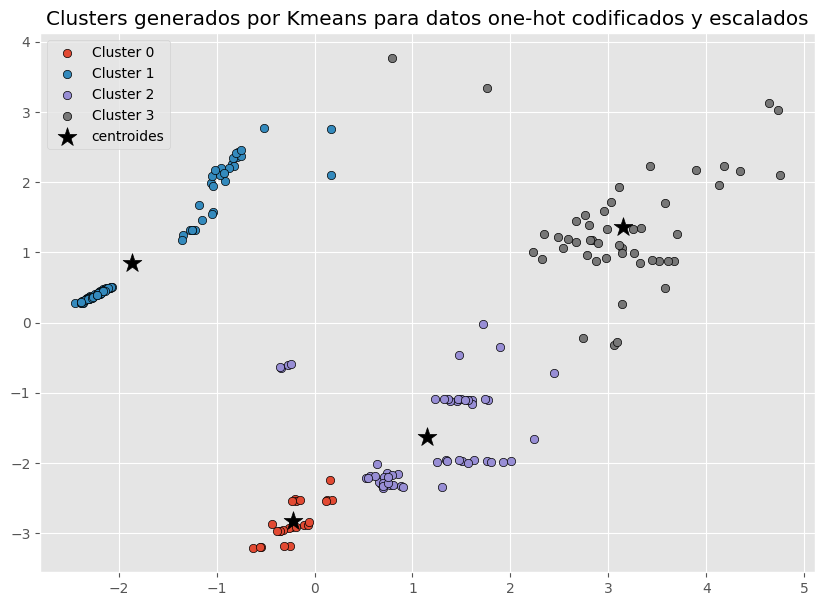

Tiempo de ejecución: 0.03760886192321777 segundos
Silhouette Score: 0.640046630260907


In [118]:
# Aplicar KMeans a los datos transformados por PCA
n_clusters = 4
start = time.time()
centroides, asignaciones = kmeans(X_one_hot_pca, n_clusters)

end = time.time()

silhouette_kmeans = silhouette_score(X_one_hot_pca, asignaciones)

plt.figure(figsize=(10, 7))
for i in np.unique(asignaciones):
    plt.scatter(
        x = X_one_hot_pca[np.array(asignaciones) == i, 0],
        y = X_one_hot_pca[np.array(asignaciones) == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

plt.scatter(
    x = centroides[:, 0],
    y = centroides[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
plt.title('Clusters generados por Kmeans para datos one-hot codificados y escalados')
plt.legend()
plt.show()
print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette_kmeans}")

times_score.append({"time": end - start, "algorithm": "Custom Kmeans"})
silhouette_scores.append({"score": silhouette_kmeans, "algorithm": "Custom Kmeans"})


### Kmeans scikit

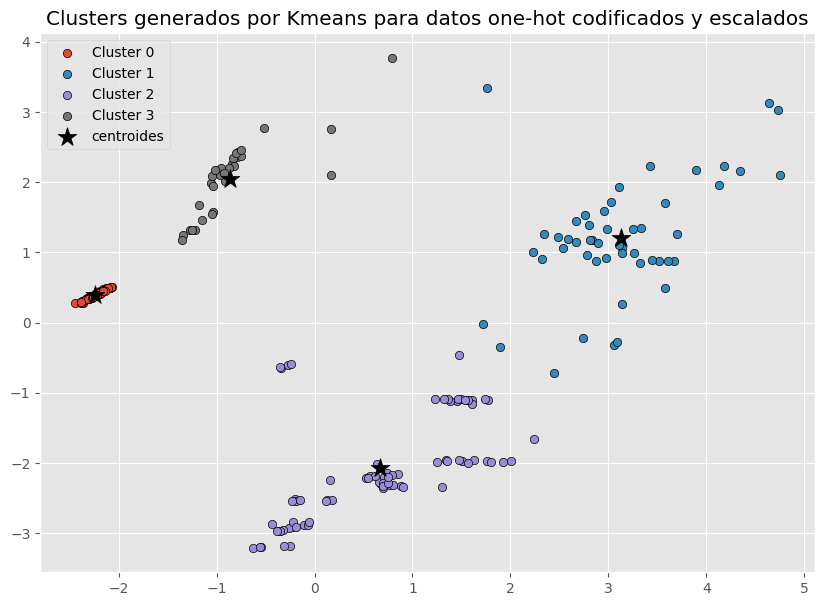

Tiempo de ejecución: 0.004893779754638672 segundos
Silhouette Score: 0.7272977616753254


In [119]:
# Kmeans with scikit-learn
start = time.time()
kmeans_scikit = KMeans(n_clusters=4, random_state=23)
kmeans_scikit.fit(X_one_hot_pca)
y_predict = kmeans_scikit.predict(X_one_hot_pca)

end = time.time()

# Show the silhouette score
silhouette = silhouette_score(X_one_hot_pca, y_predict)

plt.figure(figsize=(10, 7))
for i in np.unique(y_predict):
    plt.scatter(
        x = X_one_hot_pca[y_predict == i, 0],
        y = X_one_hot_pca[y_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

plt.scatter(
    x = kmeans_scikit.cluster_centers_[:, 0],
    y = kmeans_scikit.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)

plt.title('Clusters generados por Kmeans para datos one-hot codificados y escalados')
plt.legend()
plt.show()

print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette}")

times_score.append({"time": end - start, "algorithm": "KMeans scikit-learn OHE"})
silhouette_scores.append({"score": silhouette, "algorithm": "KMeans scikit-learn OHE"})

Para una mayor profundización en el algoritmo Kmeans propio hemos decidido probarlo con nuestros datos, y podemos observar que los grupos creados entre el Kmeans de scikit y el propio son distintos, esto se puede deber a la inicialización de los centroides. En conclusión, nuestro Kmeans no ajusta los grupos tan bien como el de scikit cuando los datos son más dispersos y no tan aglomerados.

### Hierarchical cluster

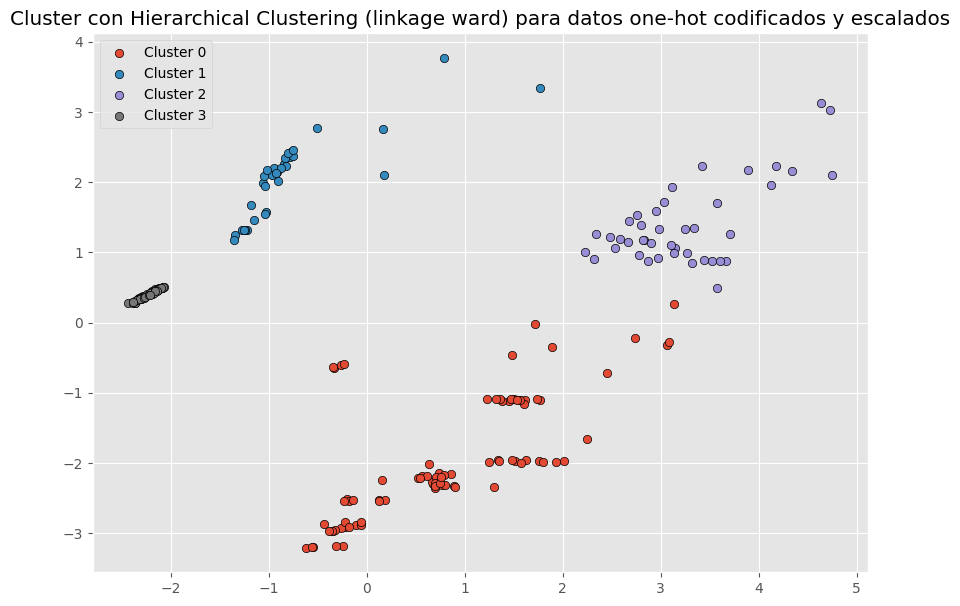

Tiempo de ejecución: 0.002468585968017578 segundos
Silhouette Score: 0.7046251494177557


In [120]:
start = time.time()
# Clustering jerárquico
hc = AgglomerativeClustering(n_clusters=4, linkage = 'ward')
y_hc = hc.fit_predict(X_one_hot_pca)

end = time.time()

# Show the silhouette score
silhouette_hc = silhouette_score(X_one_hot_pca, y_hc)

plt.figure(figsize=(10, 7))
for i in np.unique(y_hc):
    plt.scatter(
        x = X_one_hot_pca[np.array(y_hc) == i, 0],
        y = X_one_hot_pca[np.array(y_hc) == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )
plt.title('Cluster con Hierarchical Clustering (linkage ward) para datos one-hot codificados y escalados')
plt.legend()
plt.show()

print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette_hc}")
 
times_score.append({"time": end - start, "algorithm": "Hierarchical Clustering (link ward) OHE"})
silhouette_scores.append({"score": silhouette_hc, "algorithm": "Hierarchical Clustering (link ward) OHE"})


### DBSCAN

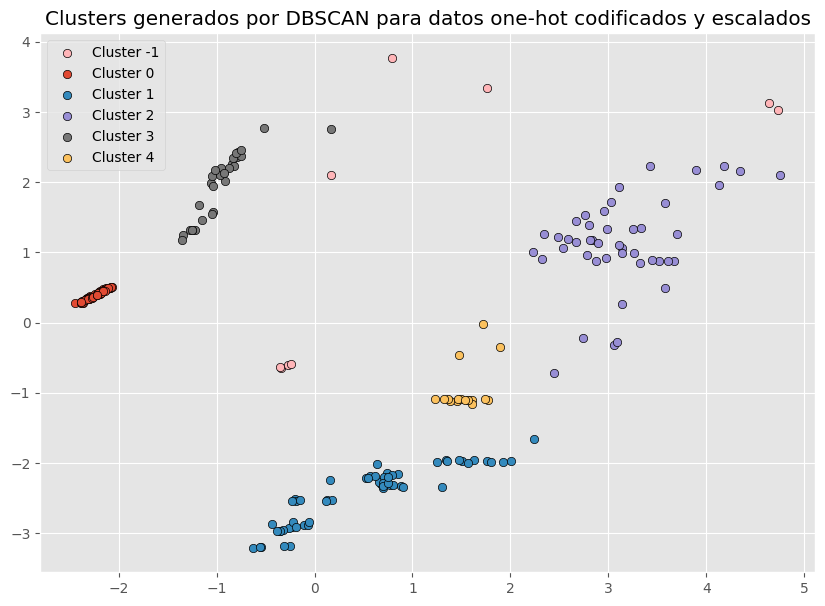

Tiempo de ejecución: 0.005842685699462891 segundos
Silhouette Score: 0.6429750131963875


In [121]:
start = time.time()
# Entrenamos el modelo
dbscan = DBSCAN(eps=0.7, metric= 'euclidean')
dbscan.fit(X_one_hot_pca)

end = time.time()

# Show the silhouette score
silhouette_dbscan = silhouette_score(X_one_hot_pca, dbscan.labels_)

# Representamos los resultados
labels = dbscan.labels_
dbscan_OHE_labels = labels

# show clusters
plt.figure(figsize=(10, 7))
for i in np.unique(labels):
    plt.scatter(
        x = X_one_hot_pca[labels == i, 0],
        y = X_one_hot_pca[labels == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

plt.title('Clusters generados por DBSCAN para datos one-hot codificados y escalados')
plt.legend()
plt.show()

print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette_dbscan}")

times_score.append({"time": end - start, "algorithm": "DBSCAN OHE"})
silhouette_scores.append({"score": silhouette_dbscan, "algorithm": "DBSCAN OHE"})

## 3.3.- Modelos con Ordinal Encoding

Probamos los mismo modelos que el one hot encoding pero con los datos que transformamos antes a ordinal encoding

### Kmeans propio

Iteración final:  4
Centroides finales:  [[-0.29079621 -0.90770912]
 [-2.02205121 -0.10007725]
 [ 0.90999306 -1.31236532]
 [ 2.74960727  0.10699807]
 [-0.71666571  1.35725052]
 [ 0.06378674  3.05551488]]


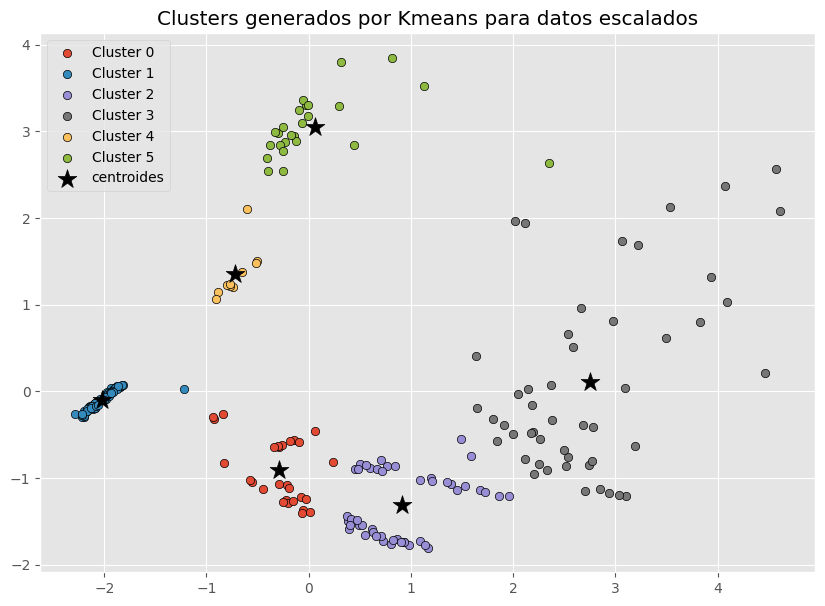

Tiempo de ejecución: 0.04823017120361328 segundos
Silhouette Score: 0.6019428774850949


In [122]:
n_clusters = 6
# Aplicar KMeans a los datos transformados por PCA
start = time.time()
centroides_oe, asignaciones_oe = kmeans(X_ordinal_pca, n_clusters)

end = time.time()

# Show the silhouette score
silhouette_oe = silhouette_score(X_ordinal_pca, asignaciones_oe)

plt.figure(figsize=(10, 7))
for i in np.unique(asignaciones_oe):
    plt.scatter(
        x = X_ordinal_pca[np.array(asignaciones_oe) == i, 0],
        y = X_ordinal_pca[np.array(asignaciones_oe) == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

plt.scatter(
    x = centroides_oe[:, 0],
    y = centroides_oe[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
plt.title('Clusters generados por Kmeans para datos escalados')
plt.legend()
plt.show()
print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette_oe}")

times_score.append({"time": end - start, "algorithm": "Custom Kmeans OE"})
silhouette_scores.append({"score": silhouette_oe, "algorithm": "Custom Kmeans OE"})

### Kmean scikit

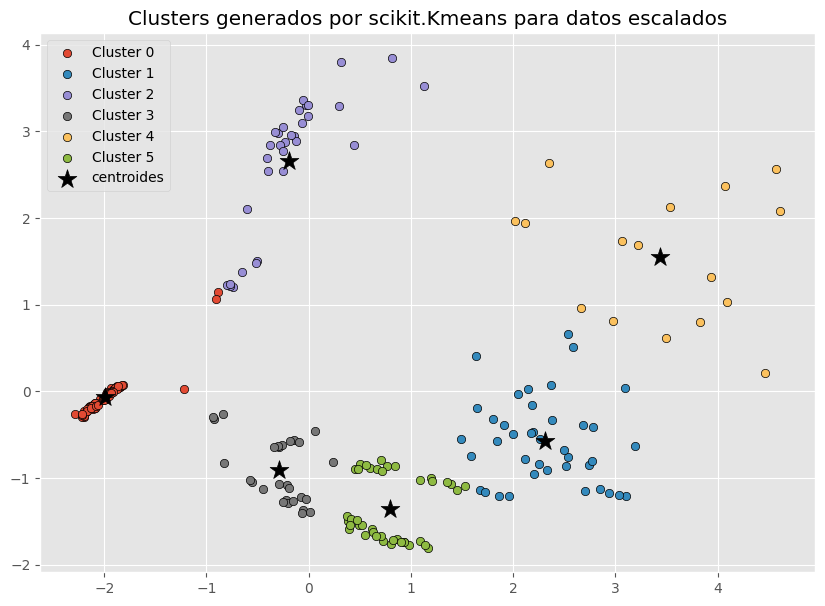

Tiempo de ejecución: 0.0038852691650390625 segundos
Silhouette Score: 0.62072421783183


In [123]:
start = time.time()
kmeans_scikit_oe = KMeans(n_clusters=6, random_state=23)
kmeans_scikit_oe.fit(X_ordinal_pca)
y_predict=kmeans_scikit_oe.predict(X_ordinal_pca)

end = time.time()

kmeans_oe_cluster = y_predict
# Show the silhouette score
silhouette = silhouette_score(X_ordinal_pca, y_predict)

plt.figure(figsize=(10, 7))
for i in np.unique(y_predict):
    plt.scatter(
        x = X_ordinal_pca[np.array(y_predict) == i, 0],
        y = X_ordinal_pca[np.array(y_predict) == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

plt.scatter(
    kmeans_scikit_oe.cluster_centers_[:, 0],
    kmeans_scikit_oe.cluster_centers_[:, 1],
    s = 200,
    c = 'black',
    marker = '*',
    label  = 'centroides'
)
plt.title('Clusters generados por scikit.Kmeans para datos escalados')
plt.legend()
plt.show()
print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette}")

times_score.append({"time": end - start, "algorithm": "KMeans scikit-learn OE"})
silhouette_scores.append({"score": silhouette, "algorithm": "KMeans scikit-learn OE"})

Al igual que lo mencionado anteriormente, hay ligeras diferencias entre lo clusters creados. Sin embargo, se puede observar que para los datos ordinales hay muchas más semejanzas entre los clusters creados por ambos modelos de clustering.

### Hierarchical Clustering

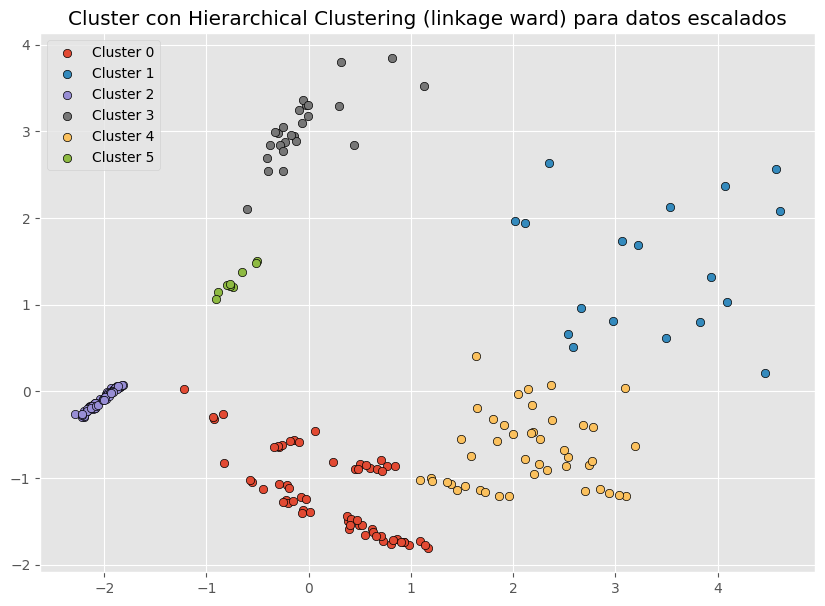

Tiempo de ejecución: 0.0013418197631835938 segundos
Silhouette Score: 0.6485576686067179


In [124]:
# Clustering jerárquico
start = time.time()
hc = AgglomerativeClustering(n_clusters=6, linkage = 'ward')
y_hc = hc.fit_predict(X_ordinal_pca)

end = time.time()

hierarchical_oe_cluster = y_hc
# Show the silhouette score
silhouette_hc = silhouette_score(X_ordinal_pca, y_hc)

plt.figure(figsize=(10, 7))

for i in np.unique(y_hc):
    plt.scatter(
        x = X_ordinal_pca[np.array(y_hc) == i, 0],
        y = X_ordinal_pca[np.array(y_hc) == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )
plt.title('Cluster con Hierarchical Clustering (linkage ward) para datos escalados')
plt.legend()
plt.show()

print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette_hc}")

times_score.append({"time": end - start, "algorithm": "Hierarchical Clustering (link ward) OE"})
silhouette_scores.append({"score": silhouette_hc, "algorithm": "Hierarchical Clustering (link ward) OE"})

### DBSCAN

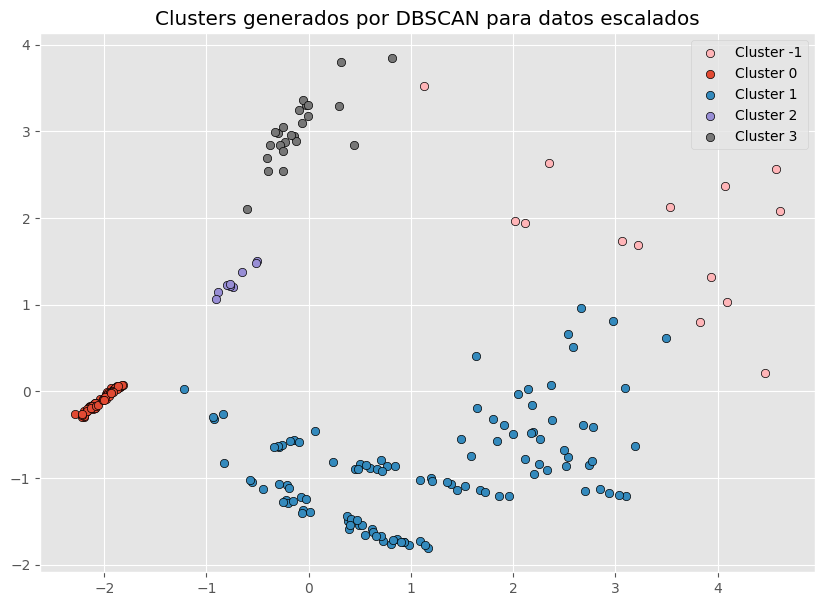

Tiempo de ejecución: 0.0 segundos
Silhouette Score: 0.593620565519156


In [125]:
# dbscan
start = time.time()
dbscan = DBSCAN(eps=0.6, metric= 'euclidean')
dbscan.fit(X_ordinal_pca)

end = time.time()

# Show the silhouette score
silhouette_dbscan = silhouette_score(X_ordinal_pca, dbscan.labels_)

labels = dbscan.labels_

# show clusters
plt.figure(figsize=(10, 7))
for i in np.unique(labels):
    plt.scatter(
        x = X_ordinal_pca[labels == i, 0],
        y = X_ordinal_pca[labels == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

plt.title('Clusters generados por DBSCAN para datos escalados')
plt.legend()
plt.show()

print(f"Tiempo de ejecución: {end - start} segundos")
print(f"Silhouette Score: {silhouette_dbscan}")

times_score.append({"time": end - start, "algorithm": "DBSCAN OE"})
silhouette_scores.append({"score": silhouette_dbscan, "algorithm": "DBSCAN OE"})

# 4.- Comparación entre One Hot Encoding (OHE) y Ordinal Encoding (OE)

[{'score': 0.640046630260907, 'algorithm': 'Custom Kmeans'}, {'score': 0.7272977616753254, 'algorithm': 'KMeans scikit-learn OHE'}, {'score': 0.7046251494177557, 'algorithm': 'Hierarchical Clustering (link ward) OHE'}, {'score': 0.6429750131963875, 'algorithm': 'DBSCAN OHE'}, {'score': 0.6019428774850949, 'algorithm': 'Custom Kmeans OE'}, {'score': 0.62072421783183, 'algorithm': 'KMeans scikit-learn OE'}, {'score': 0.6485576686067179, 'algorithm': 'Hierarchical Clustering (link ward) OE'}, {'score': 0.593620565519156, 'algorithm': 'DBSCAN OE'}]


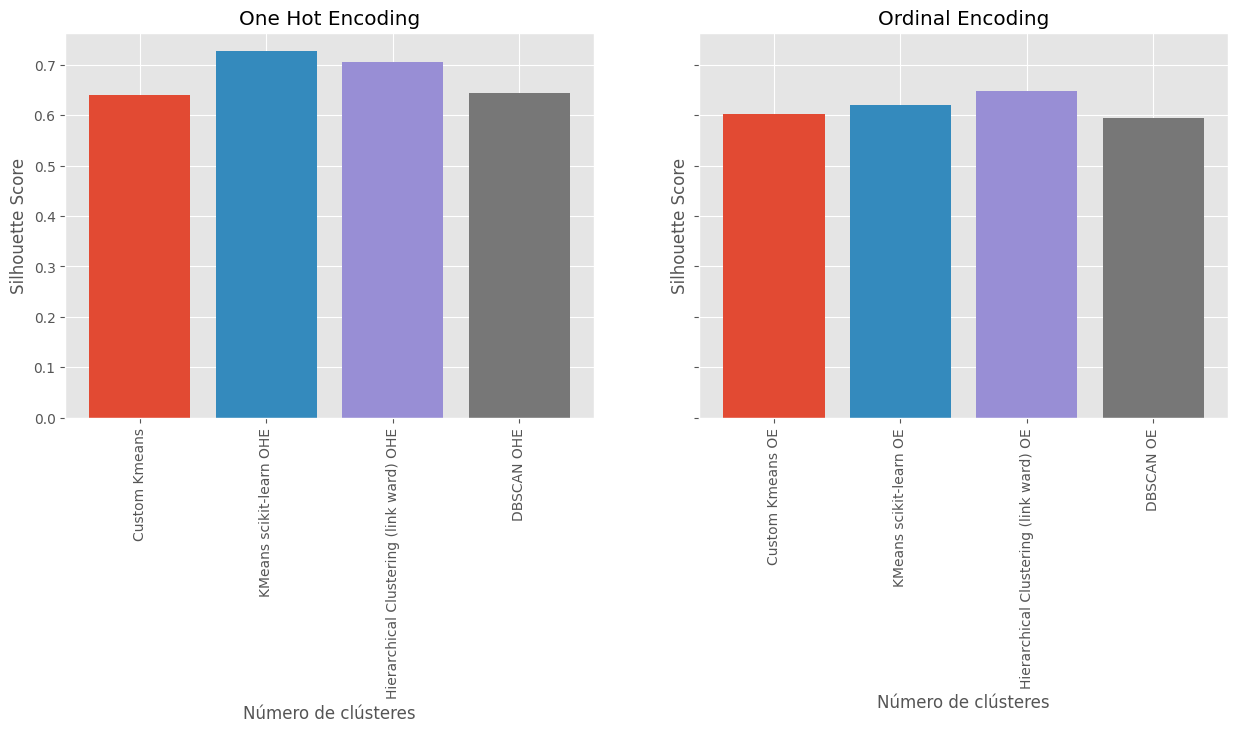

In [126]:
# Muestra en dos graficas el silhouette score para one hot encoding y ordinal encoding
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
print(silhouette_scores)
for i in range(4):
    axs[0].bar(silhouette_scores[i]['algorithm'], silhouette_scores[i]['score'])
axs[0].set_title('One Hot Encoding')
axs[0].set_ylabel('Silhouette Score')
axs[0].set_xlabel('Número de clústeres')

for i in range(4):
    axs[1].bar(silhouette_scores[i+4]['algorithm'], silhouette_scores[i+4]['score'])
axs[1].set_title('Ordinal Encoding')
axs[1].set_ylabel('Silhouette Score')
axs[1].set_xlabel('Número de clústeres')

for ax in axs:
    plt.sca(ax)
    plt.xticks(rotation=90)


El One-Hot Encoding convierte cada valor único de una variable categórica en una nueva columna binaria (0 o 1). Lo que hace es permitirnos saber sobre la presencia o ausencia de una categoría. Lo malo en nuestro caso sobre las estrellas es que no impone una relación de orden entre las categorías y aumenta considerablemente la dimensión de nuestros datos ya que crea una nueva columna por cada color. El One-hot encoding introduce multicolinealidad, lo que puede ser problemático en algunos algoritmos de clustering.

El Ordinal Encoding se basa en asignar un número entero a cada categoría única de forma ordinal, es decir en nuestro caso nos basamos en el orden dado para asignares un valor entre el 0 y el 8. Lo bueno de esta forma es que reduce la dimensionalidad de los datos en comparación con el one-hot encoding y nos ayuda en el cálculo de distancias al mantener el orden que existe en los datos. El único inconveniente es que no captura la distancia entre las categorías de forma precisa, lo que podría afectar negativamente al clustering.

Vemos en nuestro caso que no hay mucha diferencia entre hacer clustering con los datos transformados haciendo ordinal encoding y one-hot encoding, podemos observar en este gráfico que los scores del metodo de silueta es mas elevado para los datos transformados mediante One Hot Encoding. Esto se puede deber a que al hace OHE la dimensionalidad de los datos aumenta, y al hacer pca y reducir la dimensionalidad de los datos permite capturar una mayor varianza en solo dos variables. Al unir las variables con el PCA nos sirve un poco más el método one-hot encoding pero si lo hubieramos hecho solo con esas variables nos serviría mejor el ordinal encoding ya que nos ayuda a un mejor cálculo de la distancia.

# 5.- Pipeline con el mejor modelo

## 5.1.- Analisis de los resultados

Mostramos los resultados obtenidos para cada modelo

Tiempos de ejecución de los algoritmos:


,time,algorithm
0,0.037609,Custom Kmeans
1,0.004894,KMeans scikit-learn OHE
2,0.002469,Hierarchical Clustering (link ward) OHE
3,0.005843,DBSCAN OHE
4,0.048230,Custom Kmeans OE
5,0.003885,KMeans scikit-learn OE
6,0.001342,Hierarchical Clustering (link ward) OE
7,0.000000,DBSCAN OE


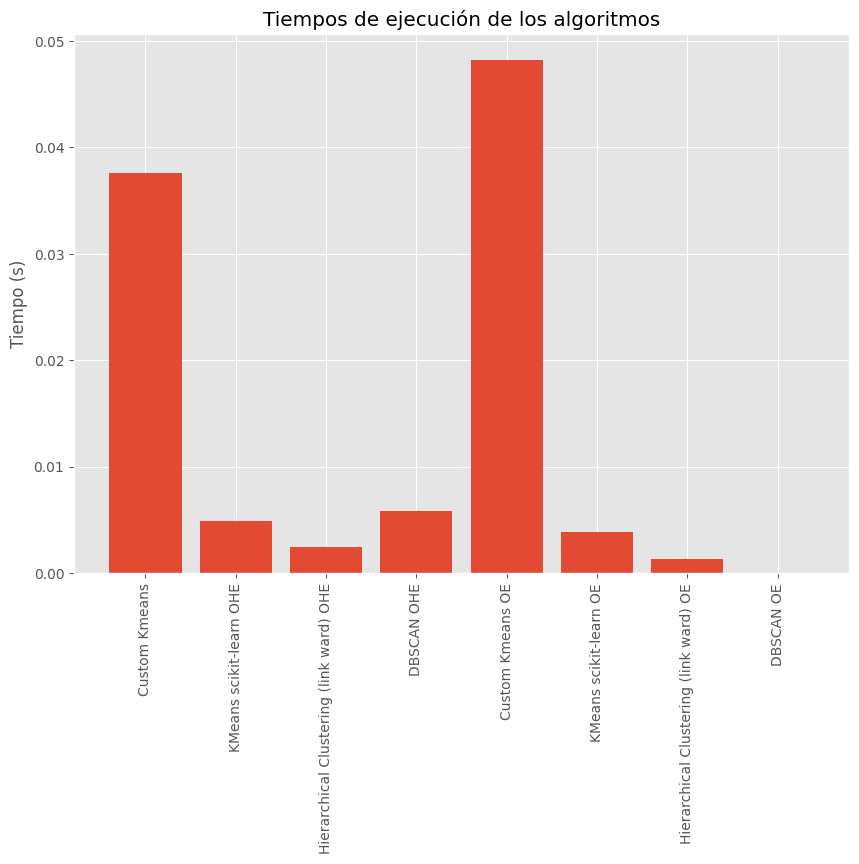

In [127]:
# Show the results
times_score_df = pd.DataFrame(times_score)

print("Tiempos de ejecución de los algoritmos:")
display(times_score_df)

# Bar plot
plt.figure(figsize=(10, 7))
plt.bar(times_score_df.algorithm, times_score_df.time)
plt.title('Tiempos de ejecución de los algoritmos')
plt.ylabel('Tiempo (s)')
plt.xticks(rotation=90)
plt.show()

Tras ver los tiempos de ejecución vemos claramente que nuestro K-means es el algoritmo mas costoso en cuanto al tiempo.Luego iria el DBSCAN, el K-means de scikit-learn y por el último el que menos tarda el hierarchical clustering. Si nuestro análisis lo basaramos solo en el score del tiempo (ya que necesitamos el modelo más rápido) el modelo que más nos interesaria sería el Hierarchical. Aunque, los tiempos de ejecución no son significativamente grandes por lo que no son tan importantes para la decisión del mejor modelo.

Silhouette Scores de los algoritmos:


,score,algorithm
0,0.640047,Custom Kmeans
1,0.727298,KMeans scikit-learn OHE
2,0.704625,Hierarchical Clustering (link ward) OHE
3,0.642975,DBSCAN OHE
4,0.601943,Custom Kmeans OE
5,0.620724,KMeans scikit-learn OE
6,0.648558,Hierarchical Clustering (link ward) OE
7,0.593621,DBSCAN OE


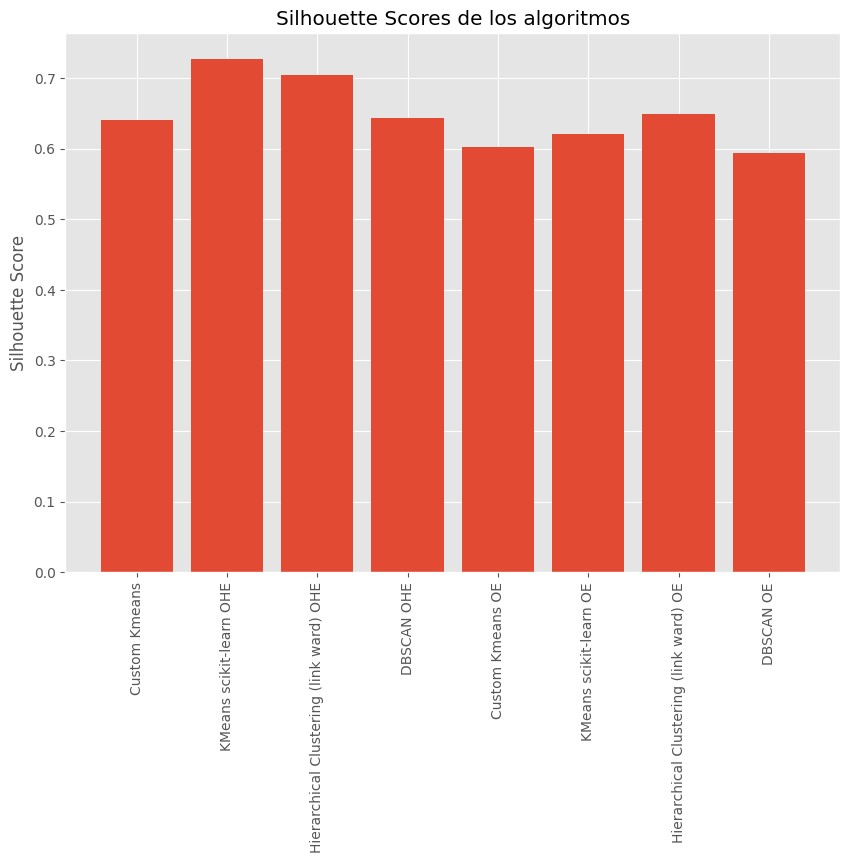

In [128]:
# Show the results
silhouette_scores_df = pd.DataFrame(silhouette_scores)

print("Silhouette Scores de los algoritmos:")
display(silhouette_scores_df)

# Bar plot
plt.figure(figsize=(10, 7))
plt.bar(silhouette_scores_df.algorithm, silhouette_scores_df.score)
plt.title('Silhouette Scores de los algoritmos')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=90)
plt.show()

El silhouette score nos ayuda a saber que modelo se ajusta mejor a nuestros datos, teniendo en cuenta los cluster. Es una medida que se utiliza para evaluar la calidad de un clustering de datos. Proporciona una medida de cuán bien están separados los clusters en comparación con cuán similares son los puntos dentro del mismo cluster. En resumen, el silhouette score nos ayuda a determinar qué tan bien se han formado los clusters y si los datos realmente pertenecen a esos clusters. El silhouette score nos ayuda a evaluar la calidad y la coherencia de un clustering. Nos ayuda a comparar los diferentes algoritmos de clustering y seleccionar la mejor para nuestros datos. Vemos que el mejor modelo es el K-means de scikit-learn para los datos transformados haciendo One-hot encoding.

## 5.2.- Pipeline del Mejor Modelo

Al ser el modelo que más se ajusta a nuestros datos y que mejor clustering tiene según el análisis que nos proporciona el silhouette score, hacemos la pipeline de esto modelo siendo el modelo más óptimo, para poder obtener los resultados sobre los datos originales hay que hacer previamente antes de llamar a la pipeline el mapeado de la columna *'Color'* y la columna *'Espectral Class'* y aplicar el One Hot Encoding.

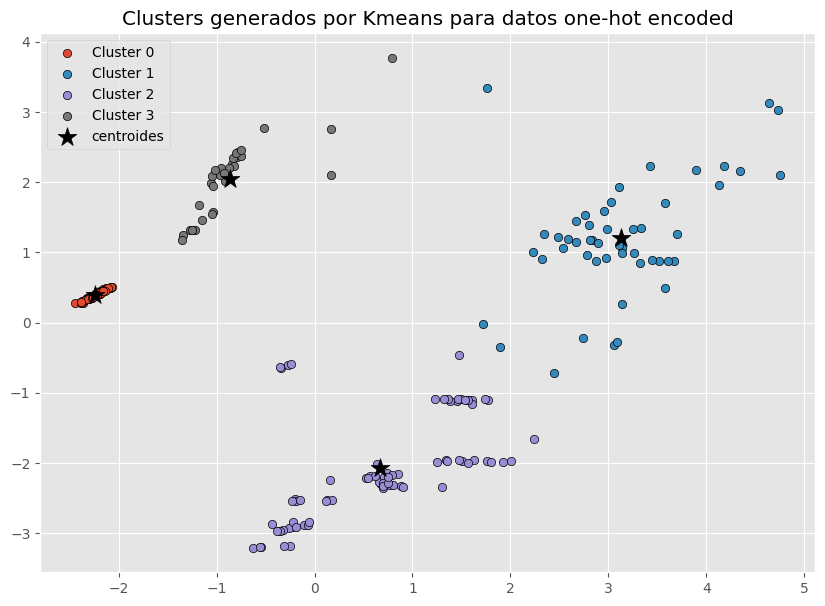

In [129]:
# pipeline del kmean de sci-kit learn para los datos one hot encoded

from sklearn.pipeline import Pipeline

# Creamos la pipeline
kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=4, random_state=23))
])

# Entrenamos la pipeline y los resultados
y_predict = kmeans_pipeline.fit_predict(one_hot_df)
plt.figure(figsize=(10, 7))
for i in np.unique(y_predict):
    plt.scatter(
        x = X_one_hot_pca[y_predict == i, 0],
        y = X_one_hot_pca[y_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

plt.scatter(
    x = kmeans_pipeline.named_steps['kmeans'].cluster_centers_[:, 0],
    y = kmeans_pipeline.named_steps['kmeans'].cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
plt.title('Clusters generados por Kmeans para datos one-hot encoded')
plt.legend()
plt.show()




# 6.- Analisis de los grupos obtenidos sobre grupos habituales

Partiendo de una clasificación de habitual por parte de los astrónomos vamos a comparar estos datos con los grupos creado en la creación de los clusters por cada modelo.

# 6.1.- Kmeans y Hierarchical para One Hot Encoding

A primera vista estos modelos generan una mejor agrupación para un valor de 4 clusters. Por otro lado los astrónomos suelen clasificar las estrellas en 6 grupos diferentes. Esto significa que la agrupación no es adecuada si las comparamos.

## 6.2.- DBscan para One Hot Encoding

Si observamos la agrupación generada DBscan genera 5 clusters más el cluster para outliers si comparamos los resultados:

In [130]:
# Add to the dataframe the cluster column
dbscan_OHE_df = data_df.copy()

dbscan_OHE_df['cluster'] = dbscan_OHE_labels

# Show the results
print("Datos con el cluster asignado por DBSCAN:")
display(dbscan_OHE_df)

Datos con el cluster asignado por DBSCAN:


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,2
236,30839,834042.000000,1194.0000,-10.63,Blue,O,-1
237,8829,537493.000000,1423.0000,-10.73,White,A,4
238,9235,404940.000000,1112.0000,-11.23,White,A,4


## 6.3.- Kmeans para Ordinal Encoding

In [131]:
# Add to the dataframe the cluster column
Kmeans_df = data_df.copy()

Kmeans_df['cluster'] = kmeans_oe_cluster

# Show the results
print("Datos con el cluster asignado por Kmeans:")
display(Kmeans_df)

Datos con el cluster asignado por Kmeans:


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,4
236,30839,834042.000000,1194.0000,-10.63,Blue,O,4
237,8829,537493.000000,1423.0000,-10.73,White,A,4
238,9235,404940.000000,1112.0000,-11.23,White,A,4


## 6.4.- Hierarchical para Ordinal Encoding

In [132]:
# Add to the dataframe the cluster column
hierarchical_oe_df = data_df.copy()

hierarchical_oe_df['cluster'] = hierarchical_oe_cluster

# Show the results
print("Datos con el cluster asignado por Hierarchical Clustering:")
display(hierarchical_oe_df)

Datos con el cluster asignado por Hierarchical Clustering:


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
0,3068,0.002400,0.1700,16.12,Red,M,2
1,3042,0.000500,0.1542,16.60,Red,M,2
2,2600,0.000300,0.1020,18.70,Red,M,2
3,2800,0.000200,0.1600,16.65,Red,M,2
4,1939,0.000138,0.1030,20.06,Red,M,2
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,1
236,30839,834042.000000,1194.0000,-10.63,Blue,O,1
237,8829,537493.000000,1423.0000,-10.73,White,A,1
238,9235,404940.000000,1112.0000,-11.23,White,A,1


## 6.5.- Ordinal Encoding

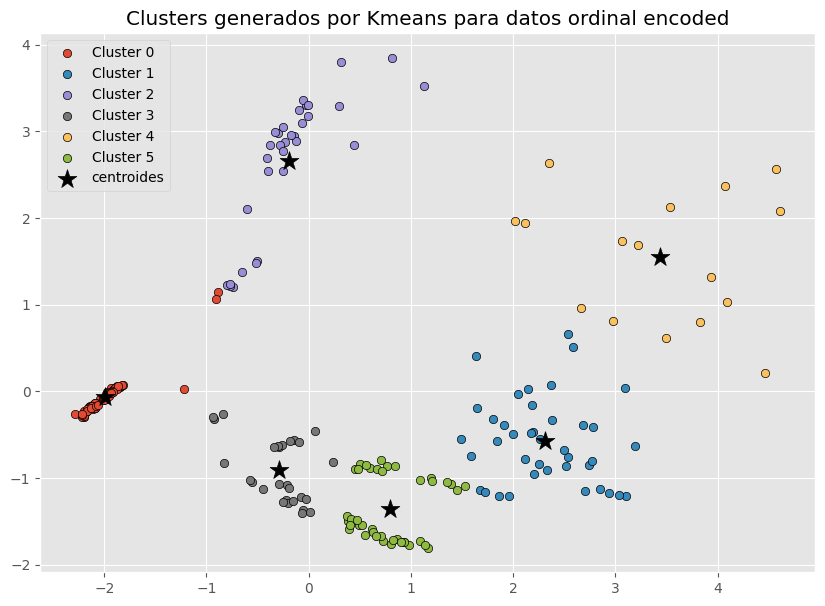

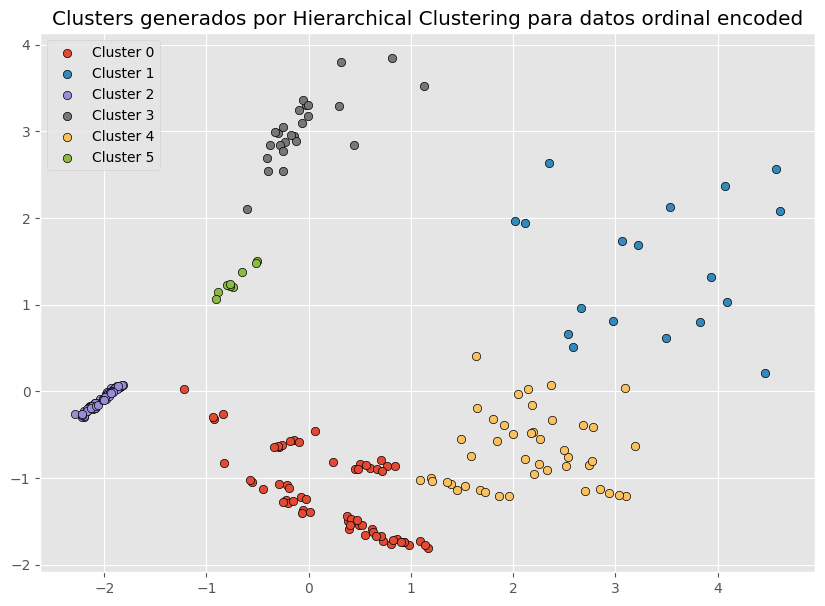

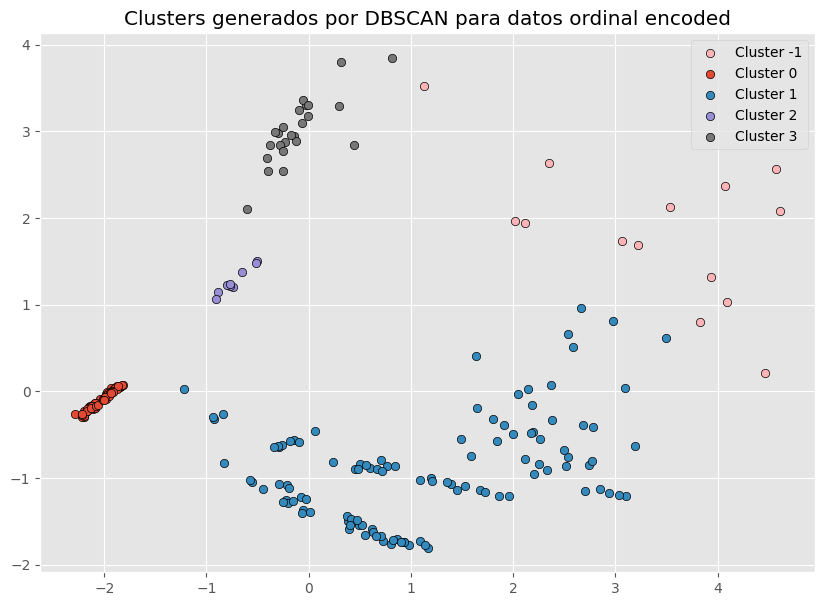

In [133]:
# hacemos pipeline que con 6 clusters haga el kmeans, el hierarchical clustering y el dbscan para los datos ordinal encoded para compararlos a los datos de los científicos

# Creamos la pipeline
kmeans_pipeline_oe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=6, random_state=23))
])

# Entrenamos la pipeline y los resultados
y_predict = kmeans_pipeline_oe.fit_predict(ordinal_df)
plt.figure(figsize=(10, 7))
for i in np.unique(y_predict):
    plt.scatter(
        x = X_ordinal_pca[y_predict == i, 0],
        y = X_ordinal_pca[y_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

plt.scatter(
    x = kmeans_pipeline_oe.named_steps['kmeans'].cluster_centers_[:, 0],
    y = kmeans_pipeline_oe.named_steps['kmeans'].cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
plt.title('Clusters generados por Kmeans para datos ordinal encoded')
plt.legend()
plt.show()

# Creamos la pipeline
hierarchical_pipeline_oe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('hierarchical', AgglomerativeClustering(n_clusters=6))
])

# Entrenamos la pipeline y los resultados
y_predict_h = hierarchical_pipeline_oe.fit_predict(ordinal_df)
plt.figure(figsize=(10, 7))
for i in np.unique(y_predict_h):
    plt.scatter(
        x = X_ordinal_pca[y_predict_h == i, 0],
        y = X_ordinal_pca[y_predict_h == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )
plt.title('Clusters generados por Hierarchical Clustering para datos ordinal encoded')
plt.legend()
plt.show()

# Creamos la pipeline
dbscan_pipeline_oe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('dbscan', DBSCAN(eps=0.6, metric= 'euclidean'))
])

# Entrenamos la pipeline y los resultados
y_predict_d = dbscan_pipeline_oe.fit_predict(ordinal_df)
y_predict_d = dbscan_pipeline_oe.fit_predict(ordinal_df)
plt.figure(figsize=(10, 7))
for i in np.unique(y_predict_d):
    plt.scatter(
        x = X_ordinal_pca[y_predict_d == i, 0],
        y = X_ordinal_pca[y_predict_d == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i % len(plt.rcParams['axes.prop_cycle'].by_key()['color'])],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )
plt.title('Clusters generados por DBSCAN para datos ordinal encoded')
plt.legend()
plt.show()









añadimos a los datos la variable cluster

In [134]:
# Add to the dataframe the cluster column

dbscan_oe_df = data_df.copy()

dbscan_oe_df['cluster'] = dbscan_pipeline_oe.named_steps['dbscan'].labels_

# Show the results
print("Datos con el cluster asignado por DBSCAN:")
display(dbscan_oe_df)

# Add to the dataframe the cluster column
Kmeans_oe_df = data_df.copy()

Kmeans_oe_df['cluster'] = kmeans_pipeline_oe.named_steps['kmeans'].labels_

# Show the results
print("Datos con el cluster asignado por Kmeans:")
display(Kmeans_oe_df)

# Add to the dataframe the cluster column
hierarchical_oe_df = data_df.copy()

hierarchical_oe_df['cluster'] = hierarchical_pipeline_oe.named_steps['hierarchical'].labels_

# Show the results
print("Datos con el cluster asignado por Hierarchical Clustering:")
display(hierarchical_oe_df)


Datos con el cluster asignado por DBSCAN:


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,-1
236,30839,834042.000000,1194.0000,-10.63,Blue,O,-1
237,8829,537493.000000,1423.0000,-10.73,White,A,-1
238,9235,404940.000000,1112.0000,-11.23,White,A,-1


Datos con el cluster asignado por Kmeans:


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,4
236,30839,834042.000000,1194.0000,-10.63,Blue,O,4
237,8829,537493.000000,1423.0000,-10.73,White,A,4
238,9235,404940.000000,1112.0000,-11.23,White,A,4


Datos con el cluster asignado por Hierarchical Clustering:


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
0,3068,0.002400,0.1700,16.12,Red,M,2
1,3042,0.000500,0.1542,16.60,Red,M,2
2,2600,0.000300,0.1020,18.70,Red,M,2
3,2800,0.000200,0.1600,16.65,Red,M,2
4,1939,0.000138,0.1030,20.06,Red,M,2
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,1
236,30839,834042.000000,1194.0000,-10.63,Blue,O,1
237,8829,537493.000000,1423.0000,-10.73,White,A,1
238,9235,404940.000000,1112.0000,-11.23,White,A,1


mostramos los valores de los clusters asociados a los datos 

In [135]:

# Kmeans
print("Kmeans")
for i in range(6):
    print(f"Cluster {i}")
    display(Kmeans_oe_df[Kmeans_oe_df['cluster'] == i])

# Hierarchical Clustering
print("Hierarchical Clustering")
for i in range(6):
    print(f"Cluster {i}")
    display(hierarchical_oe_df[hierarchical_oe_df['cluster'] == i])

# DBSCAN
print("DBSCAN")
for i in np.unique(dbscan_oe_df['cluster']):
    print(f"Cluster {i}")
    display(dbscan_oe_df[dbscan_oe_df['cluster'] == i])


Kmeans
Cluster 0


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
0,3068,0.002400,0.1700,16.120,Red,M,0
1,3042,0.000500,0.1542,16.600,Red,M,0
2,2600,0.000300,0.1020,18.700,Red,M,0
3,2800,0.000200,0.1600,16.650,Red,M,0
4,1939,0.000138,0.1030,20.060,Red,M,0
...,...,...,...,...,...,...,...
195,3598,0.002700,0.6700,13.667,Red,M,0
196,3142,0.001320,0.2580,14.120,Red,M,0
197,3496,0.001250,0.3360,14.940,Red,M,0
198,3324,0.006500,0.4710,12.780,Red,M,0


Cluster 1


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
30,39000,204000.0,10.600,-4.700,Blue,O,1
31,30000,28840.0,6.300,-4.200,Blue-White,B,1
49,33750,220000.0,26.000,-6.100,Blue,B,1
99,36108,198000.0,10.200,-4.400,Blue,O,1
100,33300,240000.0,12.000,-6.500,Blue,B,1
102,23000,127000.0,36.000,-5.760,Blue,O,1
103,17120,235000.0,83.000,-6.890,Blue,O,1
104,11096,112000.0,12.000,-5.910,Blue,O,1
105,14245,231000.0,42.000,-6.120,Blue,O,1
106,24630,363000.0,63.000,-5.830,Blue,O,1


Cluster 2


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
40,3826,200000.0,19.0,-6.93,Red,M,2
41,3365,340000.0,23.0,-6.20,Red,M,2
43,3200,195000.0,17.0,-7.22,Red,M,2
44,3008,280000.0,25.0,-6.00,Red,M,2
45,3600,320000.0,29.0,-6.60,Red,M,2
47,3574,200000.0,89.0,-5.24,Red,M,2
48,3625,184000.0,84.0,-6.74,Red,M,2
50,3490,270000.0,1520.0,-9.40,Red,M,2
51,3750,283000.0,1260.0,-7.63,Red,M,2
52,3834,272000.0,1183.0,-9.20,Red,M,2


Cluster 3


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
21,7740,0.000490,0.01234,14.020,White,A,3
22,7220,0.000170,0.01100,14.230,White,F,3
23,8500,0.000500,0.01000,14.500,White,A,3
25,12990,0.000085,0.00984,12.230,White-Yellow,F,3
26,8570,0.000810,0.00970,14.200,Blue-White,A,3
27,7700,0.000110,0.01280,14.470,White-Yellow,F,3
28,11790,0.000150,0.01100,12.590,White-Yellow,F,3
29,7230,0.000080,0.01300,14.080,Yellow-Orange,F,3
34,5800,0.810000,0.90000,5.050,White-Yellow,F,3
35,8052,8.700000,1.80000,2.420,White,A,3


Cluster 4


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
101,40000,813000.0,14.0,-6.230,Blue,O,4
173,26000,316000.0,1679.0,-9.100,Blue,B,4
177,11000,170000.0,1779.0,-9.900,Blue-White,B,4
179,24490,248490.0,1134.5,-8.240,Blue-White,B,4
227,10930,783930.0,25.0,-6.224,Blue,O,4
229,21738,748890.0,92.0,-7.346,Blue,O,4
230,24145,382993.0,1494.0,-8.840,Blue-White,B,4
231,38234,272830.0,1356.0,-9.290,Blue,O,4
232,32489,648430.0,1948.5,-10.840,Blue,O,4
233,27739,849420.0,1252.0,-7.590,Blue-White,B,4


Cluster 5


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
20,25000,0.05600,0.00840,10.580,Blue-White,B,5
24,16500,0.01300,0.01400,11.890,Blue-White,B,5
32,15276,1136.00000,7.20000,-1.970,Blue-White,B,5
33,9700,74.00000,2.89000,0.160,White,B,5
83,17200,0.00098,0.01500,12.450,Blue-White,B,5
84,14100,0.00067,0.00890,12.170,Blue-White,B,5
86,12010,0.00078,0.00920,12.130,Blue-White,B,5
87,10980,0.00074,0.00870,11.190,Blue-White,B,5
89,19860,0.00110,0.01310,11.340,Blue,B,5
94,9030,45.00000,2.63000,1.450,Blue-White,A,5


Hierarchical Clustering
Cluster 0


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
20,25000,0.05600,0.00840,10.580,Blue-White,B,0
21,7740,0.00049,0.01234,14.020,White,A,0
22,7220,0.00017,0.01100,14.230,White,F,0
23,8500,0.00050,0.01000,14.500,White,A,0
24,16500,0.01300,0.01400,11.890,Blue-White,B,0
...,...,...,...,...,...,...,...
209,19360,0.00125,0.00998,11.620,Blue,B,0
211,10012,552.00000,5.85600,0.013,Blue-White,A,0
212,13089,788.00000,5.99200,-0.120,Blue-White,A,0
216,9320,29.00000,1.91000,1.236,Blue-White,A,0


Cluster 1


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
101,40000,813000.0,14.0,-6.230,Blue,O,1
173,26000,316000.0,1679.0,-9.100,Blue,B,1
176,18000,200000.0,1045.0,-8.300,Blue,O,1
177,11000,170000.0,1779.0,-9.900,Blue-White,B,1
179,24490,248490.0,1134.5,-8.240,Blue-White,B,1
226,9892,593900.0,80.0,-7.262,Blue,O,1
227,10930,783930.0,25.0,-6.224,Blue,O,1
229,21738,748890.0,92.0,-7.346,Blue,O,1
230,24145,382993.0,1494.0,-8.840,Blue-White,B,1
231,38234,272830.0,1356.0,-9.290,Blue,O,1


Cluster 2


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
0,3068,0.002400,0.1700,16.120,Red,M,2
1,3042,0.000500,0.1542,16.600,Red,M,2
2,2600,0.000300,0.1020,18.700,Red,M,2
3,2800,0.000200,0.1600,16.650,Red,M,2
4,1939,0.000138,0.1030,20.060,Red,M,2
...,...,...,...,...,...,...,...
195,3598,0.002700,0.6700,13.667,Red,M,2
196,3142,0.001320,0.2580,14.120,Red,M,2
197,3496,0.001250,0.3360,14.940,Red,M,2
198,3324,0.006500,0.4710,12.780,Red,M,2


Cluster 3


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
50,3490,270000.0,1520.0,-9.40,Red,M,3
51,3750,283000.0,1260.0,-7.63,Red,M,3
52,3834,272000.0,1183.0,-9.20,Red,M,3
53,3749,550000.0,1648.0,-8.05,Orange,M,3
54,3650,310000.0,1324.0,-7.79,Red,M,3
55,3450,263000.0,1349.0,-11.75,Red,M,3
56,3660,363000.0,1673.0,-11.92,Red,M,3
57,3450,174000.0,1284.0,-11.28,Red,M,3
58,3752,209000.0,955.0,-11.24,Red,M,3
59,3535,195000.0,1546.0,-11.36,Red,M,3


Cluster 4


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
30,39000,204000.0,10.600,-4.700,Blue,O,4
31,30000,28840.0,6.300,-4.200,Blue-White,B,4
32,15276,1136.0,7.200,-1.970,Blue-White,B,4
49,33750,220000.0,26.000,-6.100,Blue,B,4
99,36108,198000.0,10.200,-4.400,Blue,O,4
100,33300,240000.0,12.000,-6.500,Blue,B,4
102,23000,127000.0,36.000,-5.760,Blue,O,4
103,17120,235000.0,83.000,-6.890,Blue,O,4
104,11096,112000.0,12.000,-5.910,Blue,O,4
105,14245,231000.0,42.000,-6.120,Blue,O,4


Cluster 5


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
40,3826,200000.0,19.0,-6.93,Red,M,5
41,3365,340000.0,23.0,-6.20,Red,M,5
42,3270,150000.0,88.0,-6.02,Red,M,5
43,3200,195000.0,17.0,-7.22,Red,M,5
44,3008,280000.0,25.0,-6.00,Red,M,5
45,3600,320000.0,29.0,-6.60,Red,M,5
46,3575,123000.0,45.0,-6.78,Red,M,5
47,3574,200000.0,89.0,-5.24,Red,M,5
48,3625,184000.0,84.0,-6.74,Red,M,5


DBSCAN
Cluster -1


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
101,40000,813000.0,14.0,-6.23,Blue,O,-1
172,4287,630000.0,1315.0,-9.20,Orange,K,-1
173,26000,316000.0,1679.0,-9.10,Blue,B,-1
177,11000,170000.0,1779.0,-9.90,Blue-White,B,-1
230,24145,382993.0,1494.0,-8.84,Blue-White,B,-1
231,38234,272830.0,1356.0,-9.29,Blue,O,-1
232,32489,648430.0,1948.5,-10.84,Blue,O,-1
233,27739,849420.0,1252.0,-7.59,Blue-White,B,-1
234,21904,748490.0,1130.0,-7.67,Blue-White,B,-1
235,38940,374830.0,1356.0,-9.93,Blue,O,-1


Cluster 0


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
0,3068,0.002400,0.1700,16.120,Red,M,0
1,3042,0.000500,0.1542,16.600,Red,M,0
2,2600,0.000300,0.1020,18.700,Red,M,0
3,2800,0.000200,0.1600,16.650,Red,M,0
4,1939,0.000138,0.1030,20.060,Red,M,0
...,...,...,...,...,...,...,...
195,3598,0.002700,0.6700,13.667,Red,M,0
196,3142,0.001320,0.2580,14.120,Red,M,0
197,3496,0.001250,0.3360,14.940,Red,M,0
198,3324,0.006500,0.4710,12.780,Red,M,0


Cluster 1


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
20,25000,0.05600,0.00840,10.580,Blue-White,B,1
21,7740,0.00049,0.01234,14.020,White,A,1
22,7220,0.00017,0.01100,14.230,White,F,1
23,8500,0.00050,0.01000,14.500,White,A,1
24,16500,0.01300,0.01400,11.890,Blue-White,B,1
...,...,...,...,...,...,...,...
225,18734,224780.00000,46.00000,-7.450,Blue,O,1
226,9892,593900.00000,80.00000,-7.262,Blue,O,1
227,10930,783930.00000,25.00000,-6.224,Blue,O,1
228,23095,347820.00000,86.00000,-5.905,Blue,O,1


Cluster 2


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
40,3826,200000.0,19.0,-6.93,Red,M,2
41,3365,340000.0,23.0,-6.20,Red,M,2
42,3270,150000.0,88.0,-6.02,Red,M,2
43,3200,195000.0,17.0,-7.22,Red,M,2
44,3008,280000.0,25.0,-6.00,Red,M,2
45,3600,320000.0,29.0,-6.60,Red,M,2
46,3575,123000.0,45.0,-6.78,Red,M,2
47,3574,200000.0,89.0,-5.24,Red,M,2
48,3625,184000.0,84.0,-6.74,Red,M,2


Cluster 3


,Temperature,L,R,A_M,Color,Spectral_Class,cluster
50,3490,270000.0,1520.0,-9.40,Red,M,3
51,3750,283000.0,1260.0,-7.63,Red,M,3
52,3834,272000.0,1183.0,-9.20,Red,M,3
53,3749,550000.0,1648.0,-8.05,Orange,M,3
54,3650,310000.0,1324.0,-7.79,Red,M,3
55,3450,263000.0,1349.0,-11.75,Red,M,3
56,3660,363000.0,1673.0,-11.92,Red,M,3
57,3450,174000.0,1284.0,-11.28,Red,M,3
58,3752,209000.0,955.0,-11.24,Red,M,3
59,3535,195000.0,1546.0,-11.36,Red,M,3


En esta práctica el uso de chatGPT ha sido menor y solo se ha usado para preguntas mas teóricas, como el análisis de las gráficas o por el contrario para diferentes funcionalidades de la libreria scikit.learn. 